* The code for drawing the equation and specifying the range of the function and its ascending and descending points

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, sympify, lambdify

def plot_function_and_analyze_range():
    # Input from user
    func_str = input("Enter the function of x (e.g., 'x**2 + 2*x - 1'): ")

    # Parse function
    x = Symbol('x')
    func = sympify(func_str)
    f = lambdify(x, func, 'numpy')

    # Define the ranges
    ranges = [(-1, 1), (-5, 5), (-10, 10)]

    for r in ranges:
        # Generate x values for the current range
        x_vals = np.linspace(r[0], r[1], 400)
        y_vals = f(x_vals)

        # Determine max and min values of y
        y_max = np.max(y_vals)
        y_min = np.min(y_vals)

        # Determine intervals where the function is increasing or decreasing
        increasing_intervals = []
        decreasing_intervals = []
        current_interval = []
        increasing = None

        for i in range(1, len(x_vals)):
            if y_vals[i] > y_vals[i - 1]:  # Ascending
                if increasing is None or increasing is False:
                    if current_interval:
                        decreasing_intervals.append(current_interval)
                    current_interval = [x_vals[i - 1]]
                    increasing = True
                current_interval.append(x_vals[i])
            elif y_vals[i] < y_vals[i - 1]:  # Descending
                if increasing is None or increasing is True:
                    if current_interval:
                        increasing_intervals.append(current_interval)
                    current_interval = [x_vals[i - 1]]
                    increasing = False
                current_interval.append(x_vals[i])
        
        # Append the last interval if any
        if increasing is True:
            increasing_intervals.append(current_interval)
        elif increasing is False:
            decreasing_intervals.append(current_interval)

        # Plot the function with background shading for ascending/descending intervals
        plt.figure(figsize=(8, 4))
        for interval in increasing_intervals:
            plt.axvspan(interval[0], interval[-1], color='green', alpha=0.3, label='Ascending' if interval == increasing_intervals[0] else "")
        for interval in decreasing_intervals:
            plt.axvspan(interval[0], interval[-1], color='red', alpha=0.3, label='Descending' if interval == decreasing_intervals[0] else "")

        # Plot the function curve
        plt.plot(x_vals, y_vals, color='blue', label=f'y = {func}')

        # Add horizontal and vertical lines for axes
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)

        # Add titles and labels
        plt.title(f'Function Plot from x = {r[0]} to x = {r[1]}')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.grid(True)

        # Display the maximum and minimum y-values on the plot
        plt.text(r[0], y_max, f'Max y: {y_max:.2f}', verticalalignment='bottom', color='blue')
        plt.text(r[0], y_min, f'Min y: {y_min:.2f}', verticalalignment='top', color='blue')

        # Show the plot
        plt.show()

* Solve the exercise of the equation f(x)=x^2-7x

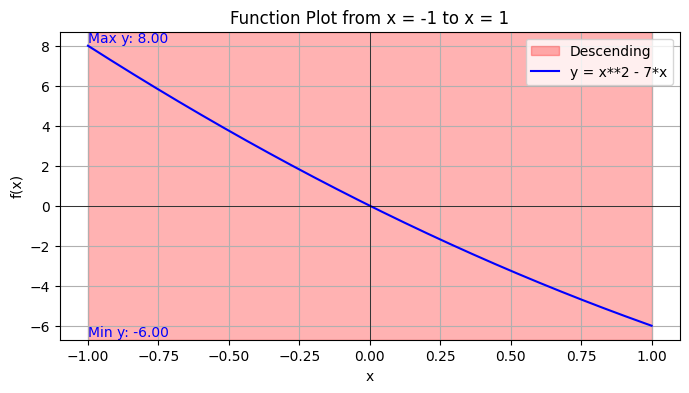

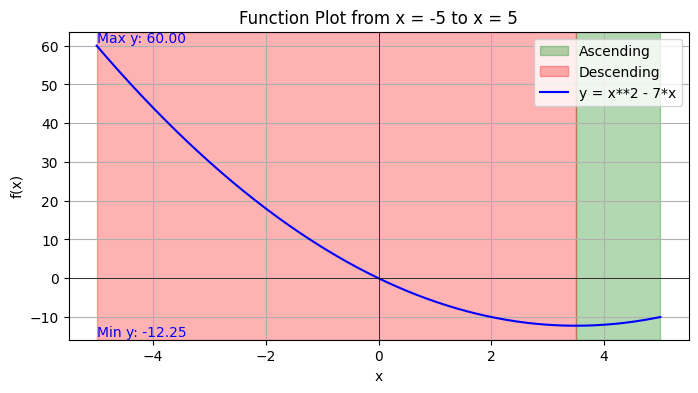

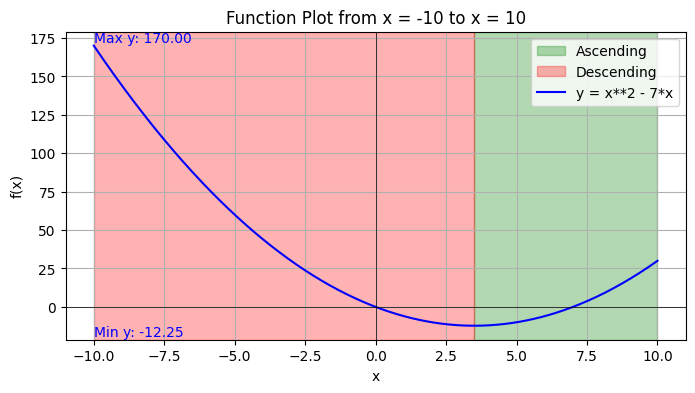

In [3]:
plot_function_and_analyze_range()

* Solve the exercise of the equation f(x)=5x^3-1

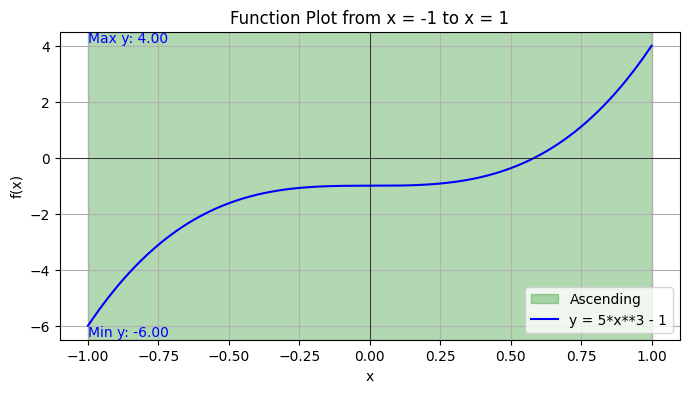

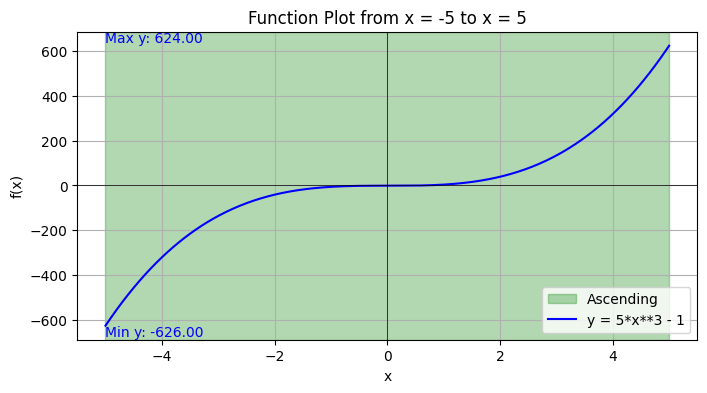

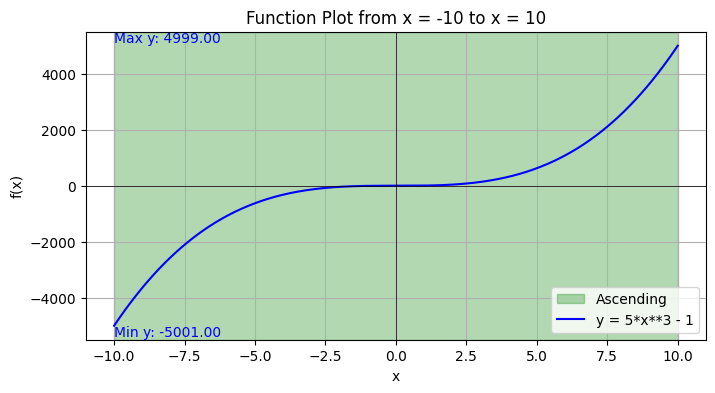

In [2]:
plot_function_and_analyze_range()

* Solve the exercise of the equation f(x)=x^10 + x^2

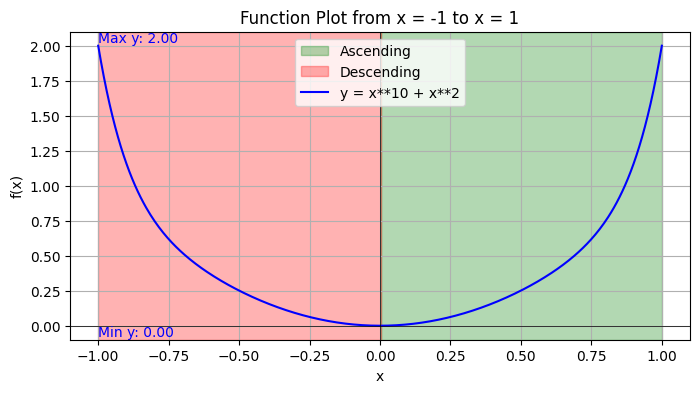

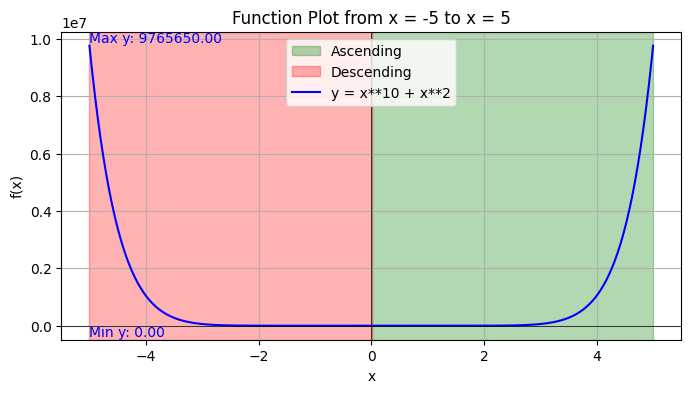

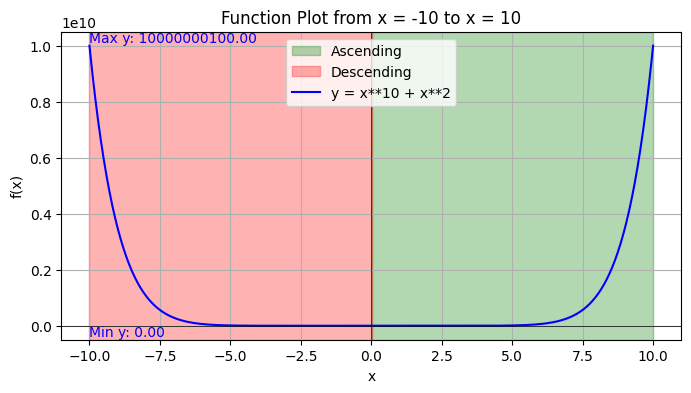

In [4]:
plot_function_and_analyze_range()